<a href="https://colab.research.google.com/github/DanielEXT10/DataStructures/blob/master/A*%20pathfinder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# comentario de prueba
def heurist(y_start,x_start,y_end,x_end):

    maze = [[0, 1, 0, 0],
            [0, 1, 0, 0],
            [0, 0, 0, 0],
            [0, 0, 0, 0]]


    start = (y_start, x_start,y_end,x_end)
    end = (y_end,x_end)

    path = astar(maze, start, end)
    print(path)




In [ ]:
def astar(maze, start, end):
    """Returns a list of tuples as a path from the given start to the given end in the given maze"""

    # Create start and end node
    start_node = Node(None, start)
    start_node.g = start_node.h = start_node.f = 0
    end_node = Node(None, end)
    end_node.g = end_node.h = end_node.f = 0

    # Initialize both open and closed list
    open_list = []
    closed_list = []

    # Add the start node
    open_list.append(start_node)

    # Loop until you find the end
    while len(open_list) > 0:

        # Get the current node
        current_node = open_list[0]
        current_index = 0
        for index, item in enumerate(open_list):
            if item.f < current_node.f:
                current_node = item
                current_index = index

        # Pop current off open list, add to closed list
        open_list.pop(current_index)
        closed_list.append(current_node)

        # Found the goal
        if current_node == end_node:
            path = []
            current = current_node
            while current is not None:
                path.append(current.position)
                current = current.parent
            return path[::-1] # Return reversed path

        # Generate children
        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]: # Adjacent squares

            # Get node position
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            # Make sure within range
            if node_position[0] > (len(maze) - 1) or node_position[0] < 0 or node_position[1] > (len(maze[len(maze)-1]) -1) or node_position[1] < 0:
                continue

            # Make sure walkable terrain
            if maze[node_position[0]][node_position[1]] != 0:
                continue

            # Create new node
            new_node = Node(current_node, node_position)

            # Append
            children.append(new_node)

        # Loop through children
        for child in children:

            # Child is on the closed list
            for closed_child in closed_list:
                if child == closed_child:
                    continue

            # Create the f, g, and h values
            child.g = current_node.g + 1
            child.h = ((child.position[0] - end_node.position[0]) ** 2) + ((child.position[1] - end_node.position[1]) ** 2)
            child.f = child.g + child.h

            # Child is already in the open list
            for open_node in open_list:
                if child == open_node and child.g > open_node.g:
                    continue

            # Add the child to the open list
            open_list.append(child)



In [ ]:
class Node():
    """A node class for A* Pathfinding"""

    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position

        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position




Robot va por la Mercancia M1 de la posicion 2,2 a la posicion 0,0

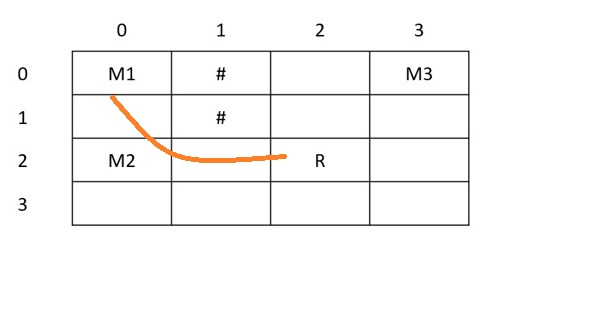

In [ ]:
#Sejecuta funcion con el fin mover el Robot de la posicion inicial 2,2 a la posicion donde esta la primer Mercancia M1.

heurist(2,2,0,0)

[(2, 2, 0, 0), (2, 1), (1, 0), (0, 0)]


Robot Lleva Mercancia M1 de la posicion 0,0 a la posicion 3,3

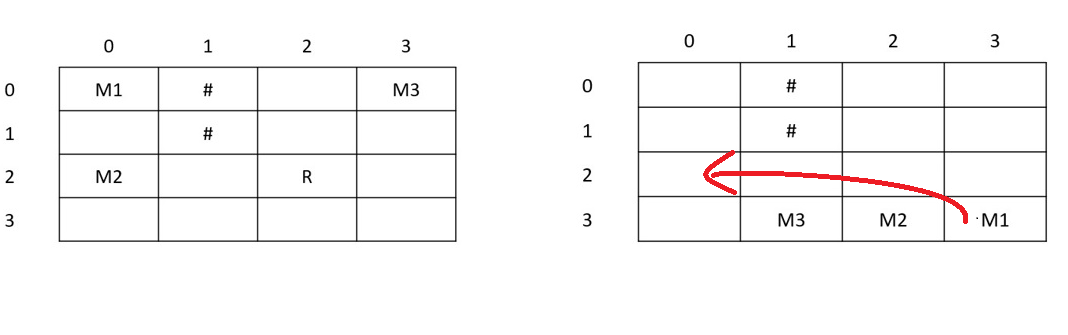

In [ ]:
heurist(0,0,3,3)

[(0, 0, 3, 3), (1, 0), (2, 1), (3, 2), (3, 3)]


In [ ]:
heurist(3,3,2,0)

[(3, 3, 2, 0), (2, 2), (2, 1), (2, 0)]


In [ ]:
heurist(2,0,3,2)

[(2, 0, 3, 2), (3, 1), (3, 2)]
